In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
!pip install xgboost
import xgboost
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Replace zeroes in features that can't be zero with NaN
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [5]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].fillna(
    df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].median())

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Column separation

In [7]:
X = df.drop("Outcome", axis =1)
y=df['Outcome']

In [8]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Feature Scaling

In [9]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

In [10]:
scaledX

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

### Data Splitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size=0.20, random_state=42)

In [12]:
X_train.shape

(614, 8)

In [13]:
X_test.shape

(154, 8)

In [14]:
round(614/768,2)

0.8

In [15]:
X.shape

(768, 8)

### Logistic Regression

In [16]:
log = LogisticRegression()
log.fit(X_train, y_train)
log_preds = log.predict(X_test)

In [17]:
log_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [18]:
accuracy_score(y_test, log_preds)

0.7532467532467533

In [58]:
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



### Random Forest Classification

In [19]:
forest = RandomForestClassifier(random_state =21)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)

In [20]:
forest_preds

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [21]:
accuracy_score(y_test, forest_preds)

0.7532467532467533

In [22]:
print(classification_report(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [23]:
cm = confusion_matrix(y_test, forest_preds)
cm

array([[78, 21],
       [17, 38]], dtype=int64)

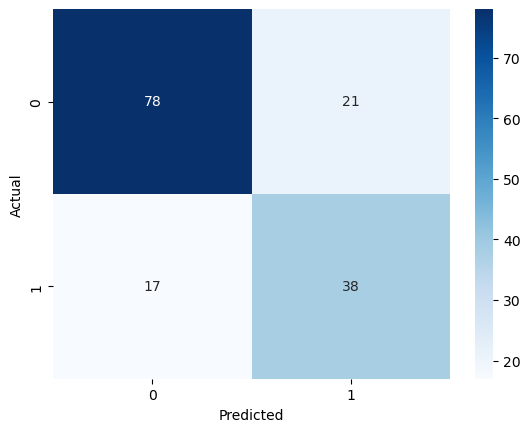

In [24]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

In [25]:
forest_prob = forest.predict_proba(X_test)[:, 1] #probability for positive class

forest_prob

array([0.42, 0.24, 0.06, 0.22, 0.53, 0.66, 0.04, 0.72, 0.7 , 0.65, 0.24,
       0.9 , 0.33, 0.29, 0.07, 0.41, 0.06, 0.02, 0.68, 0.48, 0.42, 0.05,
       0.35, 0.09, 0.36, 0.91, 0.04, 0.05, 0.13, 0.14, 0.7 , 0.67, 0.78,
       0.92, 0.68, 0.72, 0.84, 0.56, 0.19, 0.6 , 0.04, 0.26, 0.8 , 0.56,
       0.05, 0.64, 0.55, 0.13, 0.19, 0.91, 0.03, 0.85, 0.79, 0.22, 0.08,
       0.03, 0.64, 0.07, 0.29, 0.9 , 0.81, 0.19, 0.3 , 0.38, 0.07, 0.74,
       0.07, 0.6 , 0.03, 0.78, 0.78, 0.22, 0.13, 0.03, 0.16, 0.54, 0.18,
       0.16, 0.19, 0.23, 0.75, 0.04, 0.13, 0.61, 0.21, 0.9 , 0.67, 0.44,
       0.31, 0.06, 0.01, 0.11, 0.08, 0.61, 0.44, 0.57, 0.76, 0.04, 0.77,
       0.13, 0.59, 0.05, 0.61, 0.57, 0.82, 0.24, 0.29, 0.89, 0.19, 0.84,
       0.04, 0.59, 0.28, 0.92, 0.29, 0.44, 0.74, 0.33, 0.05, 0.42, 0.01,
       0.2 , 0.4 , 0.07, 0.26, 0.5 , 0.5 , 0.73, 0.78, 0.64, 0.53, 0.73,
       0.06, 0.27, 0.76, 0.41, 0.22, 0.69, 0.74, 0.05, 0.03, 0.01, 0.27,
       0.53, 0.1 , 0.3 , 0.29, 0.04, 0.41, 0.7 , 0.

In [26]:
auc_score = roc_auc_score(y_test, forest_prob)

In [27]:
auc_score

0.818457300275482

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, forest_prob)

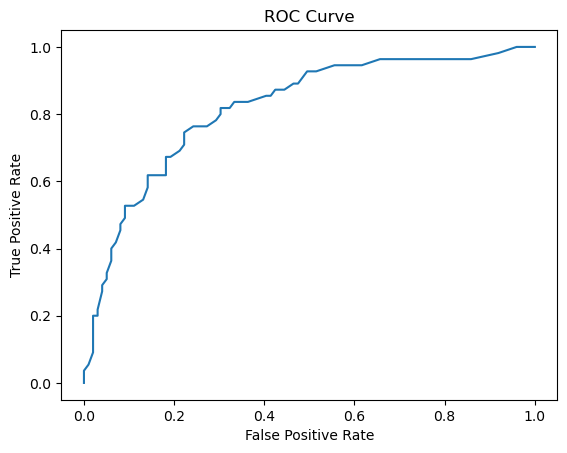

In [29]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

### Hyperparameter Tuning

In [30]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 21,
 'verbose': 0,
 'warm_start': False}

In [31]:
#define the parameter grid
param_grid = {'n_estimators':[100,200,100], 'max_depth':[None,10,15,20], 'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2]}

In [32]:
#Takes time to run
grid_search = GridSearchCV(estimator=forest, param_grid = param_grid,scoring = 'accuracy', cv=3,n_jobs=-1)

In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 100]},
             scoring='accuracy')

In [34]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [35]:
best_model = grid_search.best_estimator_

In [36]:
y_pred = best_model.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.7597402597402597

In [38]:
random_search = RandomizedSearchCV(estimator= forest, param_distributions=param_grid, scoring='accuracy',
                                   n_iter=50, cv=3, n_jobs=-1,random_state=3)

In [39]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=21),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 15, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 100]},
                   random_state=3, scoring='accuracy')

In [40]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [41]:
best_model = grid_search.best_estimator_

In [42]:
y_pred = best_model.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.7597402597402597

### Cross Validation

In [44]:
#Cross validation is used to reduce overfitting

### XGBoost

In [45]:
boost = XGBClassifier(random_state = 7)

In [46]:
scores = cross_val_score(boost,X_train, y_train, cv=5, scoring = 'accuracy')

In [47]:
scores

array([0.7804878 , 0.76422764, 0.70731707, 0.7398374 , 0.73770492])

In [48]:
boost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
cross_pred = boost.predict(X_test)

In [50]:
accuracy_score(y_test, cross_pred)

0.7142857142857143

In [51]:
print(classification_report(y_test, cross_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [52]:
scores = cross_val_score(forest, X_train, y_train, cv=5, scoring="accuracy")

In [53]:
scores

array([0.77235772, 0.79674797, 0.74796748, 0.7398374 , 0.82786885])

In [54]:
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=21)

In [55]:
cross_pred = forest.predict(X_test)

In [56]:
accuracy_score(y_test, cross_pred)

0.7532467532467533

In [57]:
print(classification_report(y_test, cross_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

